In [15]:
!pip install emoji

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2


In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import emoji

In [5]:
df_raw = pd.read_csv('merged_data.csv')

In [6]:
# Shape of the dataset
print("BEFORE CLEANING")
print(f"Total Rows: {df_raw.shape[0]}")
print(f"Total Columns: {df_raw.shape[1]}")

# Value counts of Specific Disorders
print("\nCounts of Specific Disorders:")
print(df_raw['Specific Disorders'].value_counts(dropna=False))

# Null value check for all columns
print("\nNull values in each column:")
print(df_raw.isnull().sum())

# Duplicate check
print(f"\nDuplicate Rows: {df_raw.duplicated().sum()}")

BEFORE CLEANING
Total Rows: 35760
Total Columns: 6

Counts of Specific Disorders:
Bipolar 1 Disorder                                 1988
Schizoid Personality Disorder                       999
Bipolar 2 Disorder                                  998
Anorexia Nervosa                                    997
Agoraphobia                                         997
Schizotypal Personality Disorder                    996
Hoarding Disorder                                   996
Narcolepsy                                          995
Bulimia Nervosa                                     993
Restless Legs Syndrome                              993
Post-Traumatic Stress Disorder (PTSD)               993
Persistent Depressive Disorder (Dysthymia)          993
Sleep Apnea                                         993
Seasonal Affective Disorder                         993
Obsessive-Compulsive Personality Disorder           992
Schizophrenia                                       992
Binge-Eating Disorder 

In [7]:
# Drop rows with any null values
df_cleaned = df_raw.dropna()

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()


In [8]:
print("\nAFTER CLEANING")
print(f"Total Rows: {df_cleaned.shape[0]}")
print(f"Total Columns: {df_cleaned.shape[1]}")

print("\nNull values in each column after cleaning:")
print(df_cleaned.isnull().sum())

print(f"\nDuplicate Rows after cleaning: {df_cleaned.duplicated().sum()}")

# Updated counts for Specific Disorders
print("\nUpdated Counts of Specific Disorders:")
print(df_cleaned['Specific Disorders'].value_counts())


AFTER CLEANING
Total Rows: 34233
Total Columns: 6

Null values in each column after cleaning:
Title                 0
Body                  0
Category              0
Subcategory           0
Specific Disorders    0
Type                  0
dtype: int64

Duplicate Rows after cleaning: 0

Updated Counts of Specific Disorders:
Bipolar 1 Disorder                                 1969
Post-Traumatic Stress Disorder (PTSD)               991
Agoraphobia                                         990
Attention-Deficit/Hyperactivity Disorder (ADHD)     989
Obsessive-Compulsive Disorder                       988
Insomnia                                            980
Anorexia Nervosa                                    977
Major Depressive Disorder                           977
Social Anxiety Disorder                             977
Bulimia Nervosa                                     972
Narcissistic Personality Disorder                   971
Narcolepsy                                          970
Bin

In [9]:
summary = pd.DataFrame({
    ' ': ['Total Rows', 'Duplicate Rows', 'Rows with Nulls'],
    'Before Cleaning': [
        len(df_raw),
        df_raw.duplicated().sum(),
        df_raw.isnull().any(axis=1).sum()
    ],
    'After Cleaning': [
        len(df_cleaned),
        df_cleaned.duplicated().sum(),
        df_cleaned.isnull().any(axis=1).sum()
    ]
})

print("\nSummary Table:")
print(summary.to_string(index=False))


Summary Table:
                 Before Cleaning  After Cleaning
     Total Rows            35760           34233
 Duplicate Rows              228               0
Rows with Nulls             1330               0


In [10]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
summary.to_csv('cleaning_summary.csv', index=False)

In [12]:
# Define a cleaning function
def clean_text(text):
    if pd.isnull(text):
        return text
    # Remove unwanted unicode symbols and HTML entities
    text = re.sub(r'[\n\r\t]', ' ', text)  # remove newlines, tabs
    text = re.sub(r'(&gt;|&lt;|&amp;#x200B;|&amp;|&quot;|&nbsp;)', ' ', text)  # common HTML artifacts
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # remove non-ASCII characters
    text = re.sub(r'[#@&]', ' ', text)  # remove common symbols
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
    return text


In [13]:
df_cleaned['Title'] = df_cleaned['Title'].apply(clean_text)
df_cleaned['Body'] = df_cleaned['Body'].apply(clean_text)

In [17]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

# Apply
df_cleaned['Title'] = df_cleaned['Title'].apply(remove_emojis)
df_cleaned['Body'] = df_cleaned['Body'].apply(remove_emojis)

In [18]:
df_cleaned.to_csv('cleaned_dataset_final.csv', index=False)

In [19]:
abc = pd.read_csv('cleaned_dataset_final.csv')

In [20]:
# Shape of the dataset
print("BEFORE CLEANING")
print(f"Total Rows: {abc.shape[0]}")
print(f"Total Columns: {abc.shape[1]}")

# Value counts of Specific Disorders
print("\nCounts of Specific Disorders:")
print(abc['Specific Disorders'].value_counts(dropna=False))

# Null value check for all columns
print("\nNull values in each column:")
print(abc.isnull().sum())

# Duplicate check
print(f"\nDuplicate Rows: {abc.duplicated().sum()}")

BEFORE CLEANING
Total Rows: 34233
Total Columns: 6

Counts of Specific Disorders:
Bipolar 1 Disorder                                 1969
Post-Traumatic Stress Disorder (PTSD)               991
Agoraphobia                                         990
Attention-Deficit/Hyperactivity Disorder (ADHD)     989
Obsessive-Compulsive Disorder                       988
Insomnia                                            980
Anorexia Nervosa                                    977
Major Depressive Disorder                           977
Social Anxiety Disorder                             977
Bulimia Nervosa                                     972
Narcissistic Personality Disorder                   971
Narcolepsy                                          970
Binge-Eating Disorder                               965
Restless Legs Syndrome                              964
Generalized Anxiety Disorder (GAD)                  961
Panic Disorder                                      958
Obsessive-Compulsive P

In [21]:
# Drop rows with any null values
abc_cleaned = abc.dropna()

# Drop duplicate rows
abc_cleaned = abc_cleaned.drop_duplicates()

In [22]:
summary = pd.DataFrame({
    ' ': ['Total Rows', 'Duplicate Rows', 'Rows with Nulls'],
    'Before Cleaning': [
        len(df_raw),
        df_raw.duplicated().sum(),
        df_raw.isnull().any(axis=1).sum()
    ],
    'After Cleaning': [
        len(df_cleaned),
        abc_cleaned.duplicated().sum(),
        abc_cleaned.isnull().any(axis=1).sum()
    ]
})

print("\nSummary Table:")
print(summary.to_string(index=False))


Summary Table:
                 Before Cleaning  After Cleaning
     Total Rows            35760           34233
 Duplicate Rows              228               0
Rows with Nulls             1330               0


In [23]:
abc_cleaned.to_csv('cleaned_dataset_final.csv', index=False)

In [24]:
# Value counts
disorder_counts = abc_cleaned['Specific Disorders'].value_counts()

# Display as table
disorder_table = pd.DataFrame({
    'Specific Disorder': disorder_counts.index,
    'Count': disorder_counts.values
})

print(disorder_table)

                                  Specific Disorder  Count
0                                Bipolar 1 Disorder   1968
1             Post-Traumatic Stress Disorder (PTSD)    991
2                                       Agoraphobia    989
3   Attention-Deficit/Hyperactivity Disorder (ADHD)    989
4                     Obsessive-Compulsive Disorder    988
5                                          Insomnia    980
6                                  Anorexia Nervosa    977
7                           Social Anxiety Disorder    977
8                         Major Depressive Disorder    976
9                                   Bulimia Nervosa    972
10                Narcissistic Personality Disorder    970
11                                       Narcolepsy    968
12                            Binge-Eating Disorder    965
13                           Restless Legs Syndrome    964
14               Generalized Anxiety Disorder (GAD)    961
15                                   Panic Disorder    9

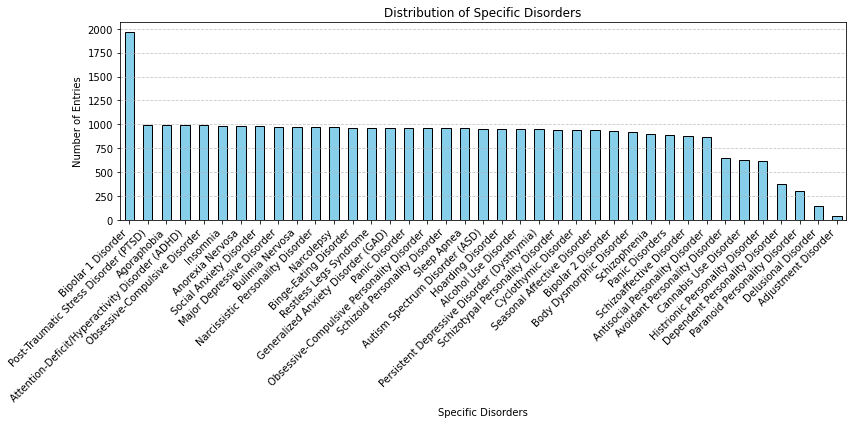

In [25]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
disorder_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Specific Disorders')
plt.xlabel('Specific Disorders')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()